# CST4050 - Individual Assessment (comp 2)

**Student**:

- Name: Facundo 
- Surname: Toneguzzo
- Student number: M00896781
- Campus: Hendon Campus

> **Important**.  
Your submission will be mainly evaluated according to your comments and not only according to the submitted code. Keep in mind that a correct code that is not well discussed, well justified and well documented will be badly evaluated.

> **How to export your notebook in PDF**.  
To export your Notebook in PDF you need to perform the following steps: 
- Save Jupyter as HTML with "*File*"-> "*Export Notebook As ...*"-> "*Export Notebook to HTML*".
- Open the HTML file in your browser. Click *Print*.
- Change the destination to "*Save to PDF*" and click "*Save*".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## 1. Loading data and preliminary analysis

Load the file `supervised.csv` in Pandas.

### 1.1. Checking the target

- Examine the *target* attribute, which is the dependent variable `Life_Expectancy`.
- Discuss whether the target attribute is numerical or nominal.
- Discuss whether the supervised problem is a classification or a regression task.
- If the target is numerical, discuss its frequency distribution.
- If the target is nominal, discuss whether classes are balanced or not.

- The outcome "Life_Expectancy" is constinuous, so the problem must be solved using Regression.

In [2]:
df =pd.read_csv (r'supervised.csv')
features = pd.DataFrame(df.loc[:, df.columns != 'Life_Expectancy']) 
outcome = pd.DataFrame(df.loc[:, df.columns == 'Life_Expectancy'])

- The feature "Country" is categorical, "Status" is ordinal and the rest of the attributes are quantitatives.

In [3]:
df.head

<bound method NDFrame.head of          Country      Status  Adult Mortality  infant deaths  \
0    Afghanistan  Developing              263             62   
1        Albania  Developing               74              0   
2        Algeria  Developing               19             21   
3         Angola  Developing              335             66   
4      Argentina  Developing              116              8   
..           ...         ...              ...            ...   
125      Uruguay  Developing              116              0   
126   Uzbekistan  Developing              184             15   
127      Vanuatu  Developing               13              0   
128       Zambia  Developing               33             27   
129     Zimbabwe  Developing              336             22   

     percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0                 71.279624           65     1154  19.1                 83   
1                364.975229           99     

- Here we can see an scatter plot of "Life_Expectancy"

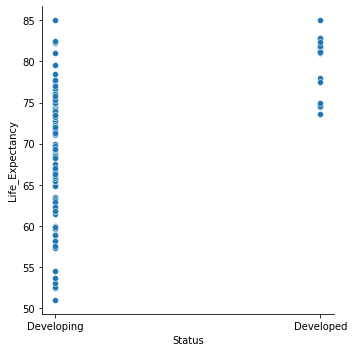

In [4]:
g = sb.relplot(data=df, x="Status", y="Life_Expectancy")
plt.show(g)


 - Our outcome is almost normal distribution, right skewed.

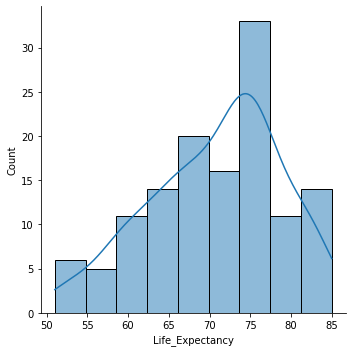

In [5]:
sb.displot(data=outcome, x="Life_Expectancy", kde=True)

# 1.2. Checking the features 

- After removing the target, all remaining attributes are your features (independent variables).
- Discuss the shape of the feature data, how many rows and columns does it contain?

- The dataset is composed by 130 observations of 18 features, this a high dimensionality problem.

In [6]:
features.shape

(130, 18)

- Featuring Engineering

In [7]:
pd.value_counts(features.Status)

Developing    111
Developed      19
Name: Status, dtype: int64

##### As we can see, the feature "Status" has two possible values only, which are "Developing" or "Developed". 
As we saw on the first plot, there is a higher "Life Expectancy" in developed countries, so we are going to transform this feature into a binary feature:
"Developing" = 0
"Developed" = 1

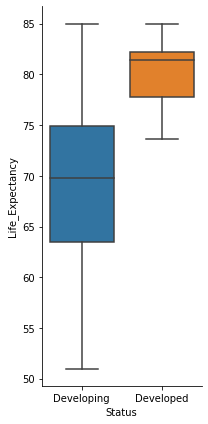

In [8]:
g = sb.catplot(x='Status', y='Life_Expectancy', data=df, kind='box', height=6, aspect=0.5)
plt.show(g)

In [9]:
features['Binary Status'] = np.where(features['Status'] == "Developed", 1, 0) 

In [10]:
features.head()

,Country,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Binary Status
0,Afghanistan,Developing,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Albania,Developing,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,0
2,Algeria,Developing,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,0
3,Angola,Developing,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,0
4,Argentina,Developing,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,0


#### Discuss whether features are standardised.

- Features are standardised if the have mean 0 and std dev 1, which is not the case.

In [11]:
features.describe()

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Binary Status
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000
mean,158.676923,27.723077,3.355807,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923,0.146154
std,99.484969,96.426702,32.567606,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159,0.354627
min,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000,0.000000
25%,79.000000,0.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000,0.000000
50%,145.500000,3.000000,0.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000,0.000000
75%,215.000000,20.500000,0.000000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000,0.000000
max,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000,1.000000


- For a Regression task, such as OLS, we need no-multicollinearity between features.

- As many of the measures are correlated, for example "Infant Deaths" with "Under-five deaths" or "thinness 1-19 years" and "thinness 5-9 years" between others we are going to leave one of each pairs.

- One interesting case is case is the correlation between "BMI", "Income composition of resources" and "Schooling".

- Make a PCA would help reducing the feature space, but we would be loosing the interpretability of the model.

<AxesSubplot:>

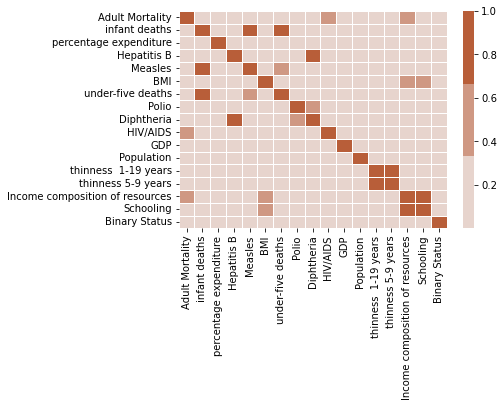

In [12]:
cmap = sb.diverging_palette(50, 25, as_cmap=False)
sb.heatmap(features.corr()**2, cmap=cmap, center=0, square=False, linewidths=1)

In [13]:
del features['Status']
del features['Country']
del features['Income composition of resources']
del features['thinness 5-9 years']
del features['infant deaths']

### Now, the new feature space is made of 14 features.

<AxesSubplot:>

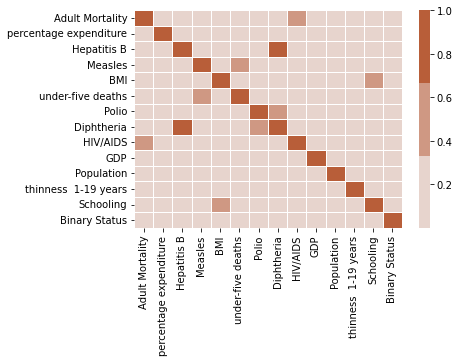

In [14]:
cmap = sb.diverging_palette(50, 25, as_cmap=False)
sb.heatmap(features.corr()**2, cmap=cmap, center=0, square=False, linewidths=1)

## 2. Training and testing a machine learning pipeline

- Propose a machine learning pipeline suited to predict the target, given the available features.
- Motivate your choices: why the proposed pipeline among the many?
- Explain whether your proposed pipeline standardises the feature data. Motivate your choices.
- Explain whether your proposed pipeline transforms feature data and how. Motivate your choices.
- Split your data needs into train and test.
- Train your supervised learning model.
- Show the accuracy of your model by using appropriate unseen data.
- Discuss whether you need to compare your accuracy to a baseline.
- Discuss whether your final model overfits or underfits.

#### The model must be solved with a regularisation tecnique for a high dimensionality.

- We can use OLS, with the PCA to get independent variables, but we would be losing the interpretability as we would be working with new features (or the model would be instable).

##### As interpretability is important to find possible solutions to increase the life expectancy, I will use a regularisation model  which are Lasso & Ridge.

- -Lasso is better by reducing the feature space, which is better for the interpretability of the model.

- -Ridge, outperforms the the accuracy of the prediction over high featured spaces.

As we don't have a high correlation as we saw before and we want to keep the interpretability, we are going to use a Lasso.
Regularisation model a polynomial function that predict our outcome from the features, we are going to use a polynomial grade of one and it can be done in many times with different grades to find the one with the best accuracy

#### Explain whether your proposed pipeline standardises the feature data. Motivate your choices.

- The standardirisation of our data into a common scale, give us the bases for the Regression models, as they work with betas, which show how important is the feature over the prediction of the outcome.

In [15]:
features.describe()

,Adult Mortality,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling,Binary Status
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000
mean,158.676923,3.355807,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,12.746923,0.146154
std,99.484969,32.567606,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,2.760159,0.354627
min,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,5.400000,0.000000
25%,79.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,10.800000,0.000000
50%,145.500000,0.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,12.750000,0.000000
75%,215.000000,0.000000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,14.675000,0.000000
max,484.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,20.400000,1.000000


#### Explain whether your proposed pipeline transforms feature data and how. Motivate your choices

- As you outcome is continuous, we dont have to transform feature data on the pipeline.

##### Creating tuning and validation data

In [16]:
features_tuning, features_val, outcome_tuning, outcome_val = train_test_split(features, outcome, test_size=0.30, random_state=1, shuffle=True)


##### K-fold cross validation

In [17]:
kf = KFold(n_splits = 6, shuffle=True, random_state=0)
kf.get_n_splits(features_tuning)

6

#### 2.- Train your pipeline. 
- Split your data needs into train and test.
- Train your supervised learning model.

- K-fold cross validation give us an unbiased estimate of the accuracy of the model, as it takes different folds to train the data decreasing the probability of getting a baiased model.

- Test data is used to estimate the true accuracy of your model.

In [18]:
R2_train = []
R2_test = []

# K-fold validation
for train_index, test_index in kf.split(features_tuning):

    # Splitting data into train-test
    features_train, features_test = features_tuning.iloc[train_index], features_tuning.iloc[test_index]
    outcome_train, outcome_test = outcome_tuning.iloc[train_index], outcome_tuning.iloc[test_index]
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(outcome_train)
    outcome_train = scaler.transform(outcome_train) 
    outcome_test = scaler.transform(outcome_test)

    # Building a pipeline
    pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                     ('poly', PolynomialFeatures(1)), # polynomial grade
                     ('lm', Lasso(alpha=0.000001))]) # training a linear regression model  
        
    # Implementing our pipe
    pipe.fit(features_train, outcome_train)
    
    # Use the trained model to create predictions on train and test data
    outcome_train_pred = pipe.predict(features_train)
    outcome_test_pred = pipe.predict(features_test)
    
    # Computing the accuracy of each model
    R2_score_train = pipe.score(features_train, outcome_train)
    R2_score_test = pipe.score(features_test, outcome_test)
    
    # Updating the vector of accuracies
    R2_train.append( R2_score_train )
    R2_test.append( R2_score_test )


#### 3.- Test you pipeline and explaine

- Show the accuracy of your model by using appropriate unseen data.
- Discuss whether you need to compare your accuracy to a baseline.
- Discuss whether your final model overfits or underfits

- Compare your accuracy to a baseline is extreamly important find umbalanced classes on our dataset.

- As this is a Regularisation model, the baseline can be a "Dummy Model" take the mean of the outcome and that can be the baseline.

In [19]:
accuracieI = pd.DataFrame({"R2_train":R2_train,"R2_test": R2_test})
accuracieI.describe()

,R2_train,R2_test
count,6.000000,6.000000
mean,0.856567,0.763760
std,0.010054,0.077059
min,0.844597,0.666048
25%,0.849369,0.709323
50%,0.855036,0.764279
75%,0.864362,0.832714
max,0.869781,0.841426


- As our model has a good performance on test data, we use the whole dataset to train it

In [20]:
# Standardising feature data
scaler = StandardScaler()
scaler.fit(features)
features_sc = scaler.transform(features)

# Standardising outcome data
scaler.fit(outcome)
outcome_sc = scaler.transform(outcome) 

# Polynomial features
pol = PolynomialFeatures(1)
pol.fit(features_sc)
features_pol = pol.transform(features_sc)

# Training a Lasso regression model, alpha is the tuned one
lassoI = Lasso(alpha=0.000001, tol=1e-1)
lassoI.fit(features_pol, outcome_sc)

Lasso(alpha=1e-06, tol=0.1)

In [21]:
features_list = features.columns.values.tolist()
features_list.insert(0, 'Noise')
betas = pd.DataFrame({"Features":features_list,
                      "Betas": lassoI.coef_.ravel()})
betas

,Features,Betas
0,Noise,0.000000
1,Adult Mortality,-0.339722
2,percentage expenditure,0.020069
3,Hepatitis B,0.041306
4,Measles,0.057651
5,BMI,0.032714
6,under-five deaths,-0.015270
7,Polio,0.099594
8,Diphtheria,0.055628
9,HIV/AIDS,-0.133192


## 3. Tuning the proposed machine learning pipeline (*Optional*) 

- Discuss whether your final feature space is low dimensional or high dimensional.
- Explain whether the proposed pipeline requires any fine-tuned phase.
- Explain whether your data needs to be split into train and test, k-fold, validation set, or what.
- Show how you tune your proposed pipeline and on which portion of the data.
- Introduce the hyper-parameters you are tuning. Motivate your choices. Why those hyper-parameters and not others? What's their role in the bias-variance trade-off?
- Validate your tuned model.
- Discuss whether your final tuned model overfits or underfits.
- Compare the accuracy of your final tuned model with the accuracy you got in the previous section (non-tuned model).

#### 1.- Introduction to the new proposed Machine Learning Pipeline
- Discuss whether your final feature space is low dimensional or high dimensional.
- Explain whether the proposed pipeline requires any fine-tuned phase.
- Explain whether your data needs to be split into train and test, k-fold, validation set, or what.
- Introduce the hyper-parameters you are tuning. Motivate your choices.

- As we can see, the first model have a high dimensional feature space as we can see betas different to cero.

In [22]:
betas

,Features,Betas
0,Noise,0.000000
1,Adult Mortality,-0.339722
2,percentage expenditure,0.020069
3,Hepatitis B,0.041306
4,Measles,0.057651
5,BMI,0.032714
6,under-five deaths,-0.015270
7,Polio,0.099594
8,Diphtheria,0.055628
9,HIV/AIDS,-0.133192


##### Lasso model has hyper-parameter (lambda),which penalize overcomplex models (big features spaces), by shrinking the betas estimated towards to zero to get the best accuracy of the mode with the best bias-variance trade of.

- The value of the lambda, where the R2 has a better performance on test data, will be found on the tuning phase.

#### Why those hyper-parameters and not others? What's their role in the bias-variance trade-off?

- On ML model, overfitting means a big feature space, which depends of the training set in consecuense has a high variance on the other hand, underfitting is a reduced features space, almost independet of the training set, which means the model is wrong as is almost independent of the train test.

##### The Bias-Variance trade-off theorem say that there is a balance point where we minimize de MSE.

-On Regression:

- -Overfitting means high betas and low lambda --> High Variance
- -Underfitting means low betas and high lambda --> Wrong assumption the outcome is independent of the features

#### Show how you tune your proposed pipeline and on which portion of the data.

- Here we are going to train the same model, with different lambda.

In [23]:
R2s_train = [] # Empty array 
R2s_test = [] # Empty array 
alphas = np.logspace(-2, 1, 100) # Creates an arrays of alphas

# Trying all alphas
for a in alphas:
    R2_train = [] # Empty array
    R2_test = [] # Empty array
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(outcome_train)
    outcome_train = scaler.transform(outcome_train) 
    outcome_test = scaler.transform(outcome_test)

    # For each alpha, perform k-fold cross validation
    for train_index, test_index in kf.split(features_tuning):
        features_train, features_test = features_tuning.iloc[train_index], features_tuning.iloc[test_index]
        outcome_train, outcome_test = outcome_tuning.iloc[train_index], outcome_tuning.iloc[test_index]
    
        # Pipeline on feature data
        pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                         ('poly', PolynomialFeatures(1)), # polynomial features
                         ('lm', Lasso(alpha = a, tol=2*1e-1))]) # training a Lasso regression model    
    
        # Fitting our pipeline on train data
        pipe.fit(features_train, outcome_train)
        
        # Updating the vector of accuracies for a single fold
        R2_train.append( pipe.score(features_train, outcome_train) )
        R2_test.append( pipe.score(features_test, outcome_test) )

    # Updating the vector of accuracies for a specific alpha value
    R2s_train.append( np.mean(R2_train) )
    R2s_test.append( np.mean(R2_test) )



#### Estimated accuracy of the model

In [24]:
accuraciesLasso = pd.DataFrame({"alpha": alphas,"R2_train": R2s_train,"R2_test": R2s_test})
accuraciesLasso.describe()

,alpha,R2_train,R2_test
count,100.000000,100.000000,100.000000
mean,1.482369,0.721545,0.649561
std,2.352746,0.250007,0.230790
min,0.010000,0.000000,-0.032997
25%,0.056260,0.753273,0.713977
50%,0.316420,0.844353,0.733388
75%,1.779101,0.848297,0.768664
max,10.000000,0.851606,0.792191


- Hyper-parameter (lambda) that maximize the accuracy of our model on Test Data.

In [25]:
tunedAlpha = alphas[np.argmax(R2s_test)]
print("tuned alpha:", tunedAlpha)

tuned alpha: 0.3511191734215131


- Graphic description of the accuracy on test data across lambda

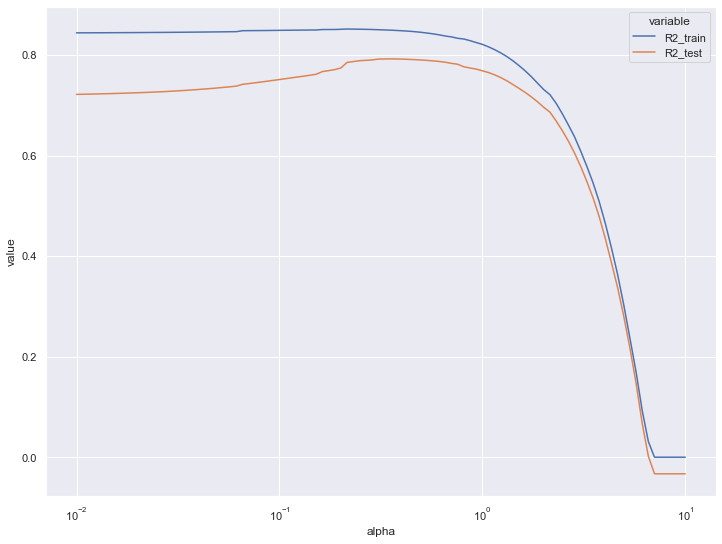

In [26]:
sb.set(rc={'figure.figsize':(12,9)})
plot = sb.lineplot(data = pd.melt(accuraciesLasso, id_vars=['alpha'], value_vars=['R2_train', 'R2_test']),
                   x="alpha", y="value", hue="variable")
plot.set_xscale('log')

#### 3.- Conclusion with the new model
- Validate your tuned model.
- Discuss whether your final tuned model overfits or underfits.
- Compare the accuracy of your final tuned model with the accuracy you got in the previous section (non-tuned model).

In [27]:
# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                 ('poly', PolynomialFeatures(1)), # polynomial features
                 ('lm', Lasso(alpha = tunedAlpha, tol=1e-1))]) # training a linear regression model 

pipe.fit(features_tuning, outcome_tuning)

outcome_tuning_pred = pipe.predict(features_tuning)
outcome_val_pred = pipe.predict(features_val)

# Accuracy scores
R2_tuning = pipe.score(features_tuning, outcome_tuning) 
R2_val = pipe.score(features_val, outcome_val)

print("R2 on tuning data:", R2_tuning)
print("R2 on validation data:", R2_val)

R2 on tuning data: 0.8456982164277148
R2 on validation data: 0.7855375409014681


In [28]:
# Training a Lasso regression model, alpha is the tuned one
lassotuned = Lasso(alpha=tunedAlpha)
lassotuned.fit(features_pol, outcome_sc)
betastuned = pd.DataFrame({"Features":features_list,"Betas": lassotuned.coef_.ravel()})

## 4. Model interpretation (*Optional*)

- Explain whether your proposed pipeline is human interpretable.
- Discuss whether features contain any multicollinearity and if this is a problem for your model interpretability.
- Perform any analysis necessary to show which features are most responsible for generating the final predictions.
- Feel free to add visualisations to support your claims.
- Feel free to comment on the stability of your findings.

- The pipeline has all the steps that a regression model has, which are interpretable, therefore it is.

- We can see that we have multicollinearity in some features

<AxesSubplot:>

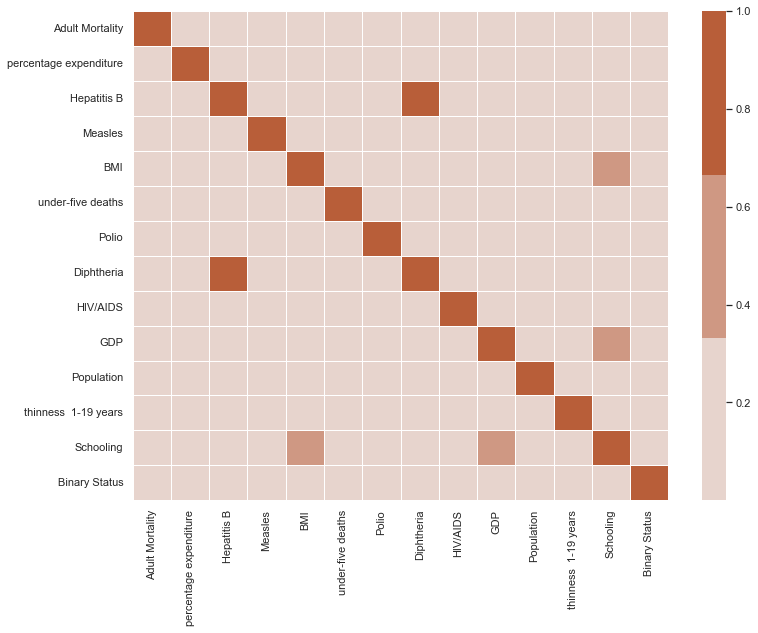

In [29]:
cmap = sb.diverging_palette(50, 25, as_cmap=False)
sb.heatmap(features_tuning.corr()**2, cmap=cmap, center=0, square=False, linewidths=1)

##### As we explain before, higher betas show us a bigger responsability on the change of our outcome and we can see that "Adult Mortality" and "Schooling" are the most relevant features.

In [30]:
betastuned

,Features,Betas
0,Noise,0.000000
1,Adult Mortality,-0.214679
2,percentage expenditure,0.000000
3,Hepatitis B,0.000000
4,Measles,-0.000000
5,BMI,0.000000
6,under-five deaths,-0.000000
7,Polio,0.000000
8,Diphtheria,0.000000
9,HIV/AIDS,-0.000000


#### The stability of the model lays on three concepts:
- Normality of residuals
- Independence of residuals
- No multicollinearity of predictors (explained before)

In [31]:
validation = pd.DataFrame({"actual": outcome_val.Life_Expectancy.values, "fitted": outcome_val_pred})
validation["residuals"] = validation.actual - validation.fitted
#validation.describe()

##### Normality of the residuals

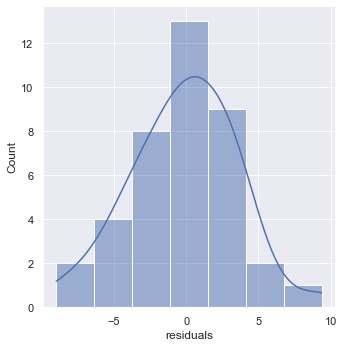

In [32]:
sb.set(rc={'figure.figsize':(4,3)})
sb.displot(validation, x="residuals", kde=True)

#### Independence of residuals

- As we can see, the "Independence of residuals" has a pattern which means that we can improve our function by using other polynomial grade such as cuadratic.

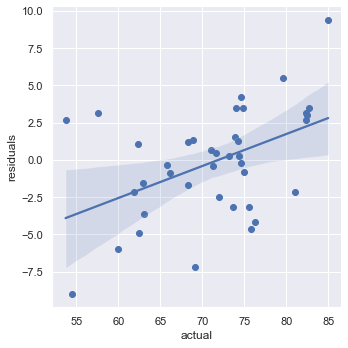

In [34]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="actual", y="residuals", scatter_kws={'alpha':1})

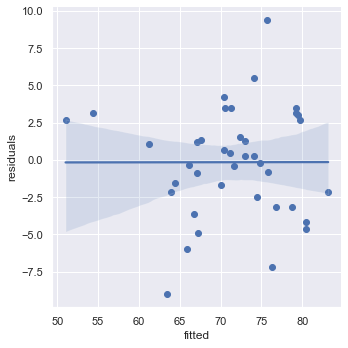

In [35]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="fitted", y="residuals", scatter_kws={'alpha':1})

## 4. Discussion: pros/cons and time complexity of the designed pipeline

- Summarise the introduced pipeline in your own words.
- Introduce the time complexity of the full introduced pipeline.
- Discuss which are the steps having the highest impact on time execution, especially to handle a larger dataset.
- Present its strengths and limitations.
- Discuss any possible way to improve it. 


##### The pipeline has four relevant phases, checking the features is for all the ML analysis is not going to be explained.

- "Train" is the first stage, where we split our dataset in "train" & "test", we create out k-fold, standardise the features to train.

- In the "Tune" phase, we will get the hyper-parameter that maximize our R2 on the unseen data.

- In the "Validate", we will get the unbiased estimate of the accuracy

- In "Predict", if our model has a good accuracy with the hyper-parameter that we defined before we train our model with the whole dataset to get the real accuracy of it to predict.

#### The total time-complexity of Lasso with tuning phase is O(a⋅k⋅n2⋅m), where:

- a is the number if α parameters to test: 100
- k is the number of folds in the k-fold cross validations: 6
- n is the number of observations: 130
- m is the number of features: 14

Large datasets means m & n, the only "parameters" that we can control on the time complexity are the a and k. 

##### The strength of this models is the high interpretability, as we know clearly which are the relevant features for the prediction.

##### The weakness is that you must create a whole pipeline we want to try other polynomial expression such as cuadratic over the linear that we model.    

#### The accuracy of the prediction can be improved in two different ways:

- Setting a different polynomial degreee for the function that is modelling our outcome.

- Changing the ML model that we use, such as Random Forrest, but we would be lossing the interpretability of the model.